In [1]:
pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 20.8 MB/s eta 0:00:00


En esta notebook vamos a unificar y mostrar algunos resultados de la integración de los scraps de 3 diarios relevantes para bahía blanca, a decir:



*   La Nueva: https://www.lanueva.com/
*   La brújula: https://www.labrujula24.com/
*   Frente a Cano: https://frenteacano.com.ar/





In [2]:
pip install stylecloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.1/262.1 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.4/161.4 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stylecloud: filename=stylecloud-0.5.2-py3-none-any.whl size=259494 sha256=2040630b9edbd846b66b76fbf9c6452b0b48cc4414b675dcde762c9bb1554320
  Stored in directory: /root/.cache/pip/wheels/aa/c8/27/9374f4fc7133015d902b5e2c75ad951edd57eb1ae948495915
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=9af611906bf6ef4ed65f3e339489a4cd97b8f82c03401df0bdd2c952b8c802d9
  Stored in directory: /root/.cache/pip/wheels/90/d

In [3]:
pip install stop-words

  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32895 sha256=0de071b766687015c08fb72ffc25c752956ccbbcccd315a7b0a74147e757034a
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop-words


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import stylecloud
import pandas as pd
import time
from datetime import datetime
import pytz
pd.set_option('display.max_colwidth', 20)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import unicodedata
import nltk
nltk.download('punkt')


from stop_words import get_stop_words


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


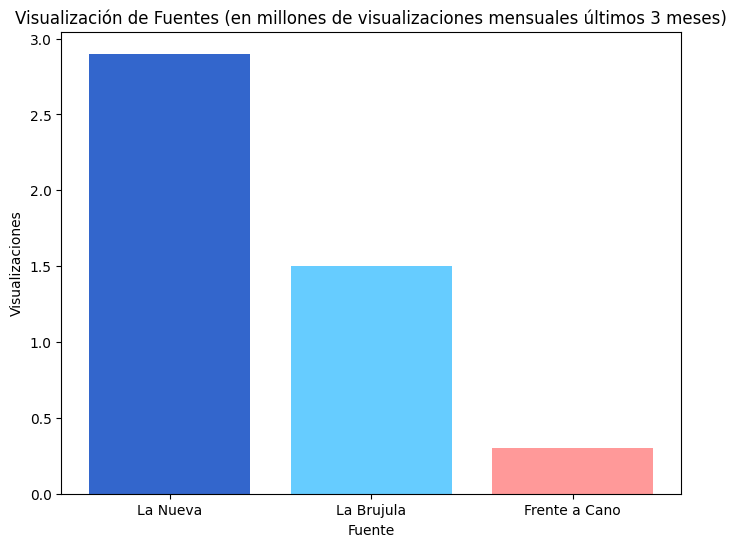

In [5]:
# Crear el DataFrame con los datos
data = {
    'fuente': ['La Nueva', 'La Brujula', 'Frente a Cano'],
    'cantidad_vm': [2.9, 1.5, 0.3]
}
df = pd.DataFrame(data)

# Calcular la participación relativa
df['participacion'] = df['cantidad_vm'] / df['cantidad_vm'].sum()

# Crear el gráfico de barras con colores pastel
plt.figure(figsize=(8, 6))
# Definir los colores
colors = ['#3366CC', '#66CCFF', '#FF9999']
plt.bar(df['fuente'], df['cantidad_vm'], color=colors)

# Añadir título y etiquetas
plt.title('Visualización de Fuentes (en millones de visualizaciones mensuales últimos 3 meses)')
plt.xlabel('Fuente')
plt.ylabel('Visualizaciones')

# Mostrar el gráfico
plt.show()

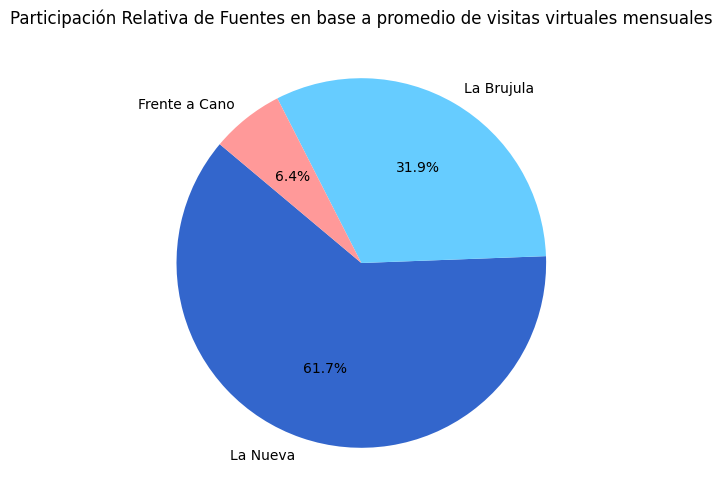

In [6]:
# Crear el gráfico de torta con colores pastel
plt.figure(figsize=(8, 6))
plt.pie(df['participacion'], labels=df['fuente'], autopct='%1.1f%%', colors=colors, startangle=140)

# Añadir título
plt.title('Participación Relativa de Fuentes en base a promedio de visitas virtuales mensuales')

# Mostrar el gráfico
plt.show()

In [7]:
# Subir archivos de la nueva resumidos

uploaded = files.upload()

# Obtener la lista de nombres de los archivos subidos
file_names = list(uploaded.keys())

# Leer archivos Parquet y almacenar los DataFrames resultantes en una lista
dfs = [pd.read_parquet(file_name) for file_name in file_names]

# Concatenar los DataFrames en uno solo
df_lanueva = pd.concat(dfs, ignore_index=True)
df_lanueva["fuente"]="lanueva"

Saving scrap_lanueva_2024-02-07_a_2024-02-17.parquet to scrap_lanueva_2024-02-07_a_2024-02-17.parquet
Saving scrap_lanueva_2024-02-17_a_2024-02-20.parquet to scrap_lanueva_2024-02-17_a_2024-02-20.parquet
Saving scrap_lanueva_2024-02-21_a_2024-02-21.parquet to scrap_lanueva_2024-02-21_a_2024-02-21.parquet
Saving scrap_lanueva_2024-02-21_a_2024-02-22.parquet to scrap_lanueva_2024-02-21_a_2024-02-22.parquet


In [8]:
df_lanueva.head()

,link,fecha,hora_ejecucion,indice,categoria,titulo,autor,fecha_publi,texto,fuente
0,https://www.lanu...,2024-02-07,20:00:00,1,mas_leida,Pasó la ola de c...,Por Redacción de...,08:51 | 07/02/2024,Ya superada la q...,lanueva
1,https://www.lanu...,2024-02-07,20:00:00,2,mas_leida,La UTA anunció u...,Por Redacción de...,09:29 | 07/02/2024,La Unión Tranvia...,lanueva
2,https://www.lanu...,2024-02-07,20:00:00,8,mas_comentada,La UTA anunció u...,Por Redacción de...,09:29 | 07/02/2024,La Unión Tranvia...,lanueva
3,https://www.lanu...,2024-02-07,20:00:00,3,mas_leida,"Ella tiene 23, é...",Por Redacción de...,13:45 | 07/02/2024,"Tiene 23 años, c...",lanueva
4,https://www.lanu...,2024-02-07,20:00:00,4,mas_leida,Luego de varios ...,Por Redacción de...,16:28 | 07/02/2024,Tras varias jorn...,lanueva


In [9]:
df_lanueva.shape

(721, 10)

In [10]:
# Subir archivos Parquet desde tu ordenador local a Colab
uploaded = files.upload()

# Obtener la lista de nombres de los archivos subidos
file_names = list(uploaded.keys())

# Leer archivos Parquet y almacenar los DataFrames resultantes en una lista
dfs = [pd.read_parquet(file_name) for file_name in file_names]

# Concatenar los DataFrames en uno solo
df_labrujula = pd.concat(dfs, ignore_index=True)
df_labrujula["fuente"]="labrujula"

Saving scrap_top_labrujula_2024-02-15_09-26-50.parquet to scrap_top_labrujula_2024-02-15_09-26-50.parquet
Saving scrap_top_labrujula_2024-02-15_09-53-54.parquet to scrap_top_labrujula_2024-02-15_09-53-54.parquet
Saving scrap_top_labrujula_2024-02-15_15-35-22.parquet to scrap_top_labrujula_2024-02-15_15-35-22.parquet
Saving scrap_top_labrujula_2024-02-15_21-34-18.parquet to scrap_top_labrujula_2024-02-15_21-34-18.parquet
Saving scrap_top_labrujula_2024-02-16_04-02-10.parquet to scrap_top_labrujula_2024-02-16_04-02-10.parquet
Saving scrap_top_labrujula_2024-02-17_12-46-34.parquet to scrap_top_labrujula_2024-02-17_12-46-34.parquet
Saving scrap_top_labrujula_2024-02-17_15-34-10.parquet to scrap_top_labrujula_2024-02-17_15-34-10.parquet
Saving scrap_top_labrujula_2024-02-18_11-08-19.parquet to scrap_top_labrujula_2024-02-18_11-08-19.parquet
Saving scrap_top_labrujula_2024-02-18_16-06-50.parquet to scrap_top_labrujula_2024-02-18_16-06-50.parquet
Saving scrap_top_labrujula_2024-02-18_22-06-49

In [11]:
# Subir archivos Parquet desde tu ordenador local a Colab
uploaded = files.upload()

# Obtener la lista de nombres de los archivos subidos
file_names = list(uploaded.keys())

# Leer archivos Parquet y almacenar los DataFrames resultantes en una lista
dfs = [pd.read_parquet(file_name) for file_name in file_names]

# Concatenar los DataFrames en uno solo
df_fac = pd.concat(dfs, ignore_index=True)
df_fac["fuente"]="frenteacano"

Saving scrap_top_frenteacano_2024-02-15_17-29-43.parquet to scrap_top_frenteacano_2024-02-15_17-29-43.parquet
Saving scrap_top_frenteacano_2024-02-15_18-13-21.parquet to scrap_top_frenteacano_2024-02-15_18-13-21.parquet
Saving scrap_top_frenteacano_2024-02-16_00-13-28.parquet to scrap_top_frenteacano_2024-02-16_00-13-28.parquet
Saving scrap_top_frenteacano_2024-02-16_06-13-26.parquet to scrap_top_frenteacano_2024-02-16_06-13-26.parquet
Saving scrap_top_frenteacano_2024-02-16_12-13-21.parquet to scrap_top_frenteacano_2024-02-16_12-13-21.parquet
Saving scrap_top_frenteacano_2024-02-16_18-10-14.parquet to scrap_top_frenteacano_2024-02-16_18-10-14.parquet
Saving scrap_top_frenteacano_2024-02-16_18-13-23.parquet to scrap_top_frenteacano_2024-02-16_18-13-23.parquet
Saving scrap_top_frenteacano_2024-02-17_00-10-08.parquet to scrap_top_frenteacano_2024-02-17_00-10-08.parquet
Saving scrap_top_frenteacano_2024-02-17_06-10-15.parquet to scrap_top_frenteacano_2024-02-17_06-10-15.parquet
Saving scr

In [12]:
df_lanueva.shape, df_labrujula.shape, df_fac.shape

((721, 10), (150, 6), (144, 6))

In [13]:
df_lanueva.head()

,link,fecha,hora_ejecucion,indice,categoria,titulo,autor,fecha_publi,texto,fuente
0,https://www.lanu...,2024-02-07,20:00:00,1,mas_leida,Pasó la ola de c...,Por Redacción de...,08:51 | 07/02/2024,Ya superada la q...,lanueva
1,https://www.lanu...,2024-02-07,20:00:00,2,mas_leida,La UTA anunció u...,Por Redacción de...,09:29 | 07/02/2024,La Unión Tranvia...,lanueva
2,https://www.lanu...,2024-02-07,20:00:00,8,mas_comentada,La UTA anunció u...,Por Redacción de...,09:29 | 07/02/2024,La Unión Tranvia...,lanueva
3,https://www.lanu...,2024-02-07,20:00:00,3,mas_leida,"Ella tiene 23, é...",Por Redacción de...,13:45 | 07/02/2024,"Tiene 23 años, c...",lanueva
4,https://www.lanu...,2024-02-07,20:00:00,4,mas_leida,Luego de varios ...,Por Redacción de...,16:28 | 07/02/2024,Tras varias jorn...,lanueva


In [14]:
df_labrujula.head()

,link,titulo,fecha,hora_ejecucion,indice,fuente
0,https://www.labr...,en el centro Int...,2024-02-15,09:26:50,1,labrujula
1,https://www.labr...,esta madrugada E...,2024-02-15,09:26:50,2,labrujula
2,https://www.labr...,fue en tres arro...,2024-02-15,09:26:50,3,labrujula
3,https://www.labr...,noroeste Clausur...,2024-02-15,09:26:50,4,labrujula
4,https://www.labr...,una fiesta de 12...,2024-02-15,09:26:50,5,labrujula


### Primer analisis: juntar todo y ver algun tipo de composición

In [15]:
df_total=pd.concat([df_lanueva[["link","titulo","fecha","hora_ejecucion","indice","fuente"]],df_labrujula,df_fac])

In [16]:
df_total.shape

(1015, 6)

In [17]:
df_total.head()

,link,titulo,fecha,hora_ejecucion,indice,fuente
0,https://www.lanu...,Pasó la ola de c...,2024-02-07,20:00:00,1,lanueva
1,https://www.lanu...,La UTA anunció u...,2024-02-07,20:00:00,2,lanueva
2,https://www.lanu...,La UTA anunció u...,2024-02-07,20:00:00,8,lanueva
3,https://www.lanu...,"Ella tiene 23, é...",2024-02-07,20:00:00,3,lanueva
4,https://www.lanu...,Luego de varios ...,2024-02-07,20:00:00,4,lanueva


Composición del Dataframe total, muy sesgado a la lanueva por tener mas observaciones por definición (El scrapper junta las 5 + leidas y las 5 + comentadas) y por contar con un mayor numero de dias corriendo

In [18]:
df_total.fuente.value_counts(normalize=True)

lanueva        0.710345
labrujula      0.147783
frenteacano    0.141872
Name: fuente, dtype: float64

Para mejorar la presicion, sacamos los indices mayores a 5 siendo que ahi solo nos quedamos con las mas leidas para los 3 diarios

In [19]:
df_total=df_total[df_total["indice"]<=5]

Se empareja un poco mas, igual sigue sesgado

In [20]:
df_total.shape

(659, 6)

In [21]:
df_total.fuente.value_counts(normalize=True)

lanueva        0.553869
labrujula      0.227618
frenteacano    0.218513
Name: fuente, dtype: float64

In [22]:
df_total.head()

,link,titulo,fecha,hora_ejecucion,indice,fuente
0,https://www.lanu...,Pasó la ola de c...,2024-02-07,20:00:00,1,lanueva
1,https://www.lanu...,La UTA anunció u...,2024-02-07,20:00:00,2,lanueva
3,https://www.lanu...,"Ella tiene 23, é...",2024-02-07,20:00:00,3,lanueva
4,https://www.lanu...,Luego de varios ...,2024-02-07,20:00:00,4,lanueva
6,https://www.lanu...,Luego de varios ...,2024-02-08,02:00:00,3,lanueva


In [23]:
df_total.shape

(659, 6)

In [24]:
df_total_unicos=df_total.drop_duplicates(subset=["link"], keep="last")
df_total_unicos.shape

(330, 6)

In [25]:
df_total_unicos.tail()

,link,titulo,fecha,hora_ejecucion,indice,fuente
134,https://frenteac...,El HCD aprobó la...,2024-02-22,12:19:17,3,frenteacano
140,https://frenteac...,Alerta meteoroló...,2024-02-22,18:19:18,1,frenteacano
141,https://frenteac...,Murió un motocic...,2024-02-22,18:19:18,2,frenteacano
142,https://frenteac...,Causa Cuadernos:...,2024-02-22,18:19:18,3,frenteacano
143,https://frenteac...,Atacó con una bo...,2024-02-22,18:19:18,4,frenteacano


In [26]:
df_total_unicos.groupby(["fecha","fuente"]).agg({"link":"count"})

,,link
fecha,fuente,
2024-02-07,lanueva,4
2024-02-08,lanueva,15
2024-02-09,lanueva,15
2024-02-10,lanueva,17
2024-02-11,lanueva,15
2024-02-12,lanueva,12
2024-02-13,lanueva,18
2024-02-14,lanueva,13
2024-02-15,frenteacano,2


In [29]:
df_total_unicos=df_total_unicos[df_total_unicos["fecha"]>="2024-02-16"]

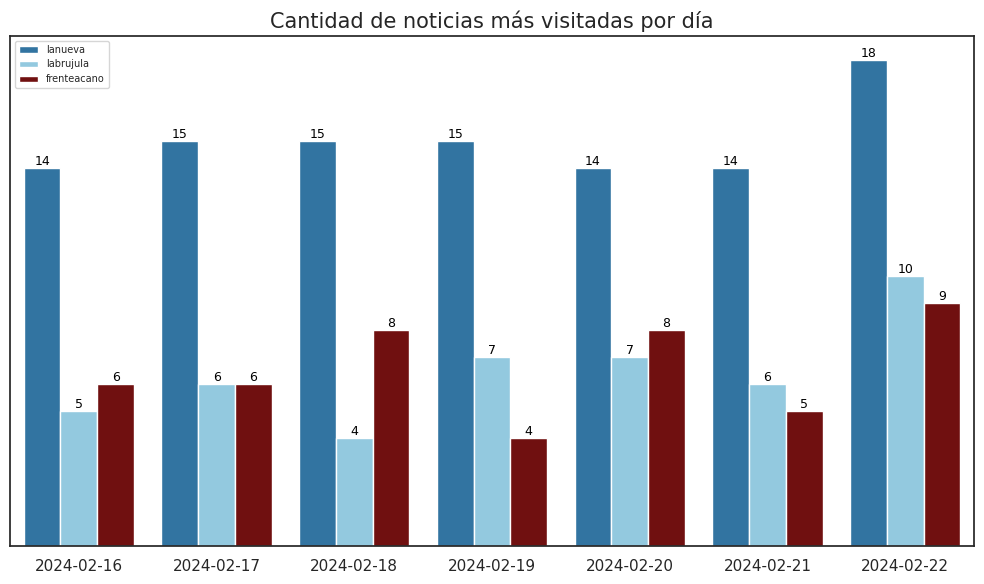

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo y paleta de colores personalizada
sns.set(style="white", palette="muted")
custom_palette = {'lanueva': '#1f77b4', 'labrujula': 'skyblue', 'frenteacano': 'maroon'}

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='fecha', hue='fuente', data=df_total_unicos, palette=custom_palette)

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Añadir título y etiquetas de los ejes
plt.title('Cantidad de noticias más visitadas por día', fontsize=15)
plt.xlabel('')
plt.gca().axes.get_yaxis().set_visible(False)  # Eliminar referencia del eje Y

# Añadir el número de observaciones encima de cada barra
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:  # Solo añadir texto si la altura es mayor que 0
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1, height, ha="center", color='black', fontsize=9)
plt.xticks(rotation=0)  # Rotación de 0 grados para la fecha

# Mostrar el gráfico
plt.legend(loc='upper left', fontsize=7)  # Ajustar la ubicación y el tamaño del legend
plt.tight_layout()
plt.show()

In [28]:
df_total_unicos.fuente.value_counts()

lanueva        232
labrujula       50
frenteacano     48
Name: fuente, dtype: int64

In [ ]:
palabras_comunes = get_stop_words('spanish')


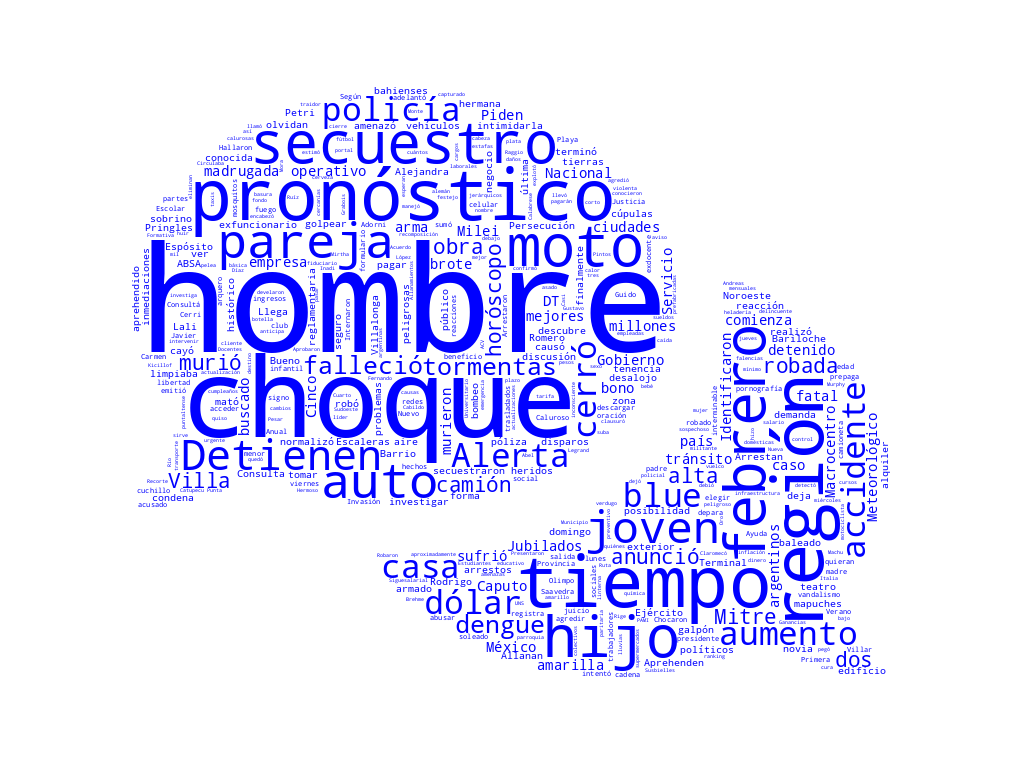

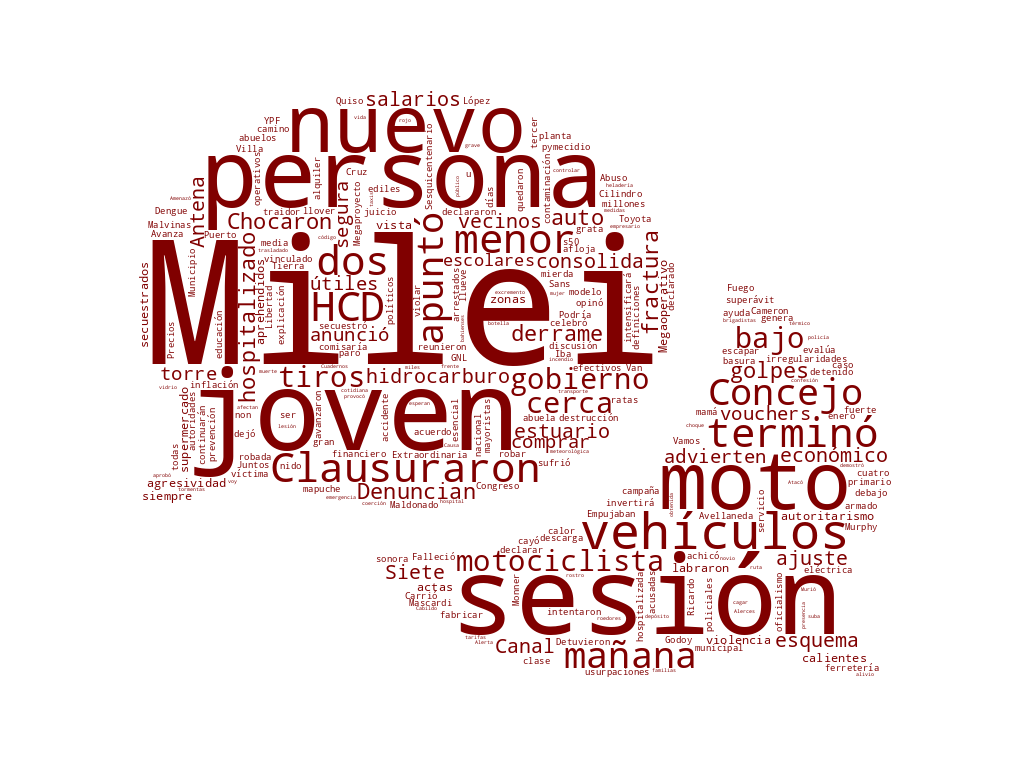

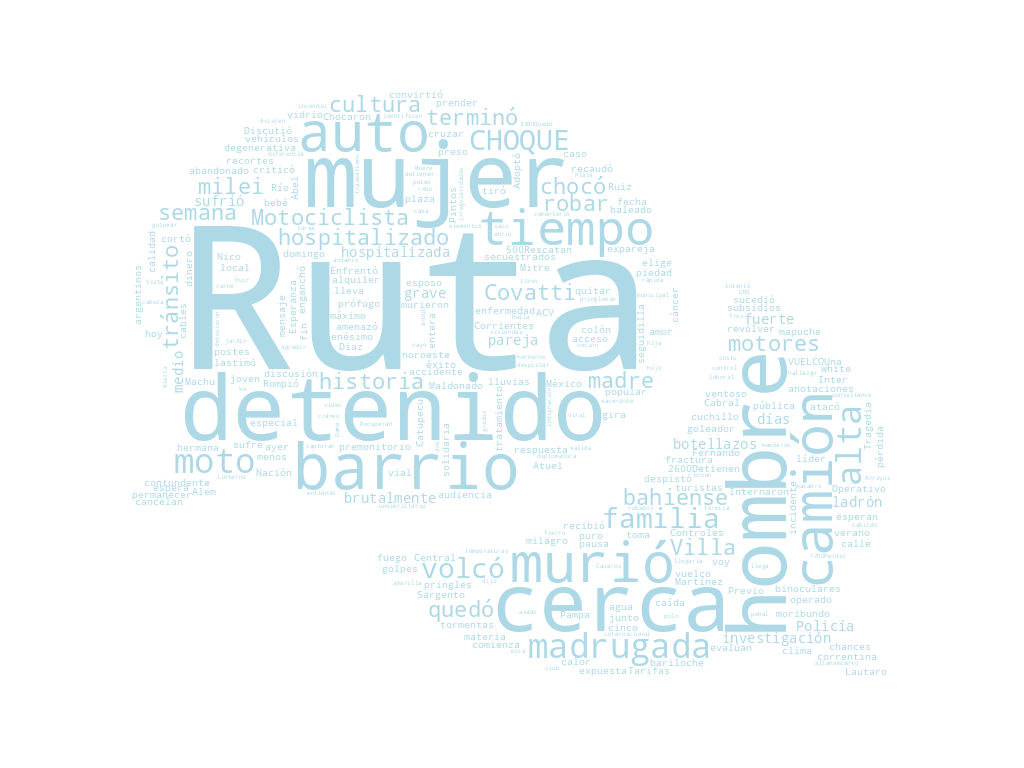

In [34]:
import stylecloud
from IPython.display import display, Image
from google.colab import files

# Obtener texto preprocesado para cada fuente
texto_lanueva = df_total_unicos[df_total_unicos['fuente'] == 'lanueva']['titulo'].str.cat(sep=' ')
texto_frenteacano = df_total_unicos[df_total_unicos['fuente'] == 'frenteacano']['titulo'].str.cat(sep=' ')
texto_labrujula = df_total_unicos[df_total_unicos['fuente'] == 'labrujula']['titulo'].str.cat(sep=' ')

# Sacar stopwords
palabras_comunes = get_stop_words('spanish')
palabras_comunes.append('ano')
palabras_comunes.append('anos')
palabras_comunes.append('Bahía')
palabras_comunes.append('Blanca')
palabras_comunes.append('cuánto')
palabras_comunes.append('Bahia')
palabras_comunes.append('Argentina')
palabras_comunes.append('Tras')
palabras_comunes.append('año')
palabras_comunes.append('años')
palabras_comunes.append('argentino')
palabras_comunes.append('argentina')
palabras_comunes.append('cómo')
palabras_comunes.append('ciudad')


# Generar nubes de palabras para cada fuente
stylecloud.gen_stylecloud(text=texto_lanueva,
                          icon_name="fas fa-comments",
                          colors='blue',  # Azul para La Nueva
                          background_color='white',
                          output_name='lanueva.png',
                          collocations=False,
                          custom_stopwords=palabras_comunes,
                          size=(1024, 768),  # Tamaño de la imagen
                          font_path=None,  # Usa la fuente predeterminada
                          gradient=None)  # No aplicar degradado de color

stylecloud.gen_stylecloud(text=texto_frenteacano,
                          icon_name="fas fa-comments",
                          colors='#800000',  # Bordo para Frente a Cano
                          background_color='white',
                          output_name='frenteacano.png',
                          collocations=False,
                          custom_stopwords=palabras_comunes,
                          size=(1024, 768),  # Tamaño de la imagen
                          font_path=None,  # Usa la fuente predeterminada
                          gradient=None)  # No aplicar degradado de color

stylecloud.gen_stylecloud(text=texto_labrujula,
                          icon_name="fas fa-comments",
                          colors='lightblue',  # Celeste para La Brújula
                          background_color='white',
                          output_name='labrujula.png',
                          collocations=False,
                          custom_stopwords=palabras_comunes,
                          size=(1024, 768),  # Tamaño de la imagen
                          font_path=None,  # Usa la fuente predeterminada
                          gradient=None)  # No aplicar degradado de color

# Mostrar las imágenes generadas por stylecloud
display(Image(filename='lanueva.png'))
display(Image(filename='frenteacano.png'))
display(Image(filename='labrujula.png'))

In [ ]:
len(df_total.link.unique())

299

### Nube de palabras de estos últimos 10 días en Bahia Blanca

#### Solo los titulos

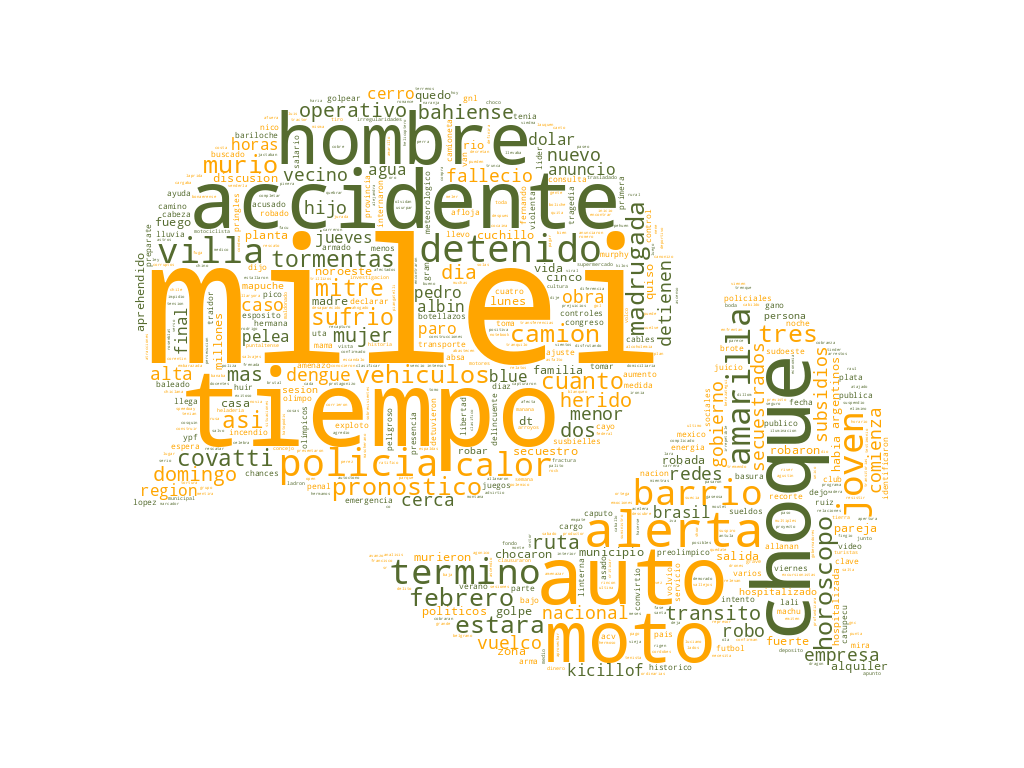

In [ ]:
# Generar la nube de palabras con parámetros adicionales para una mejor calidad de imagen
stylecloud.gen_stylecloud(text=texto_preprocesado,
                          icon_name="fas fa-comments",
                          colors=['#FFA500', '#556B2F'],  # Naranja y verde militar
                          background_color='white',
                          output_name='noticias.png',
                          collocations=False,
                          custom_stopwords=palabras_comunes,
                          size=(1024, 768),  # Especifica el tamaño de la imagen (ancho, alto)
                          font_path=None,  # Usa la fuente predeterminada
                          gradient=None,  # No aplicar degradado de color
                          )

from IPython.display import display, Image

# Mostrar la imagen generada por stylecloud
display(Image(filename='noticias.png'))

from google.colab import files
#files.download("noticias.png")

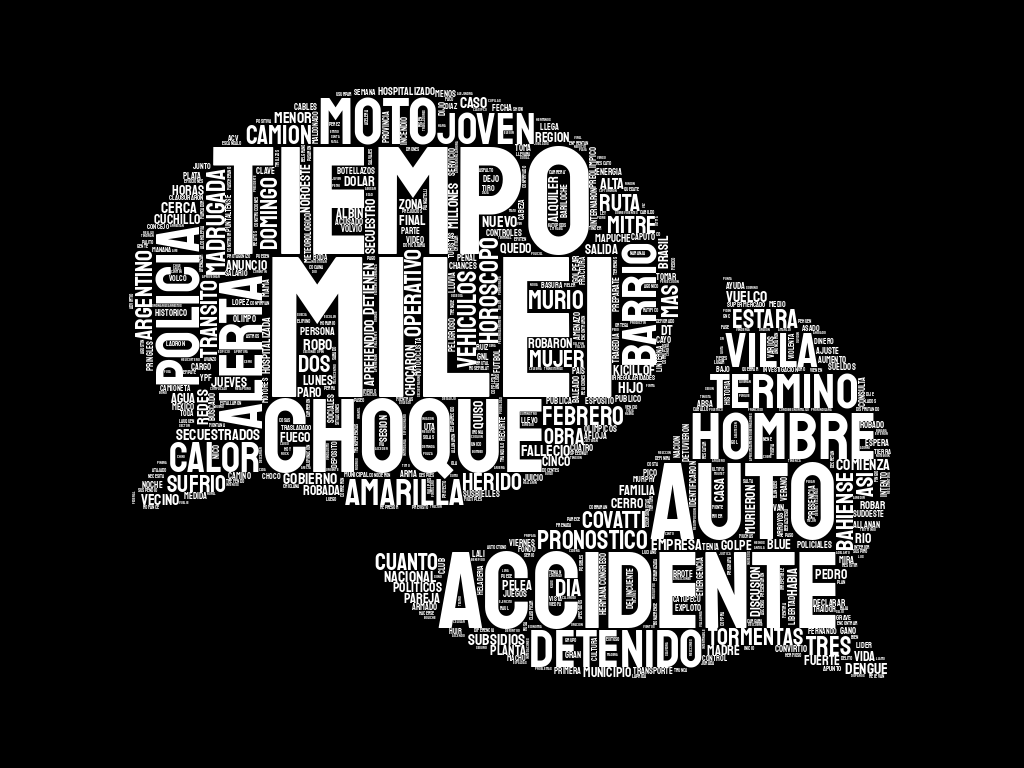

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Generar la nube de palabras con la fuente Lobster
stylecloud.gen_stylecloud(text=texto_preprocesado,
                          icon_name="fas fa-comments",
                          colors='white',
                          background_color='black',
                          output_name='noticias.png',
                          collocations=False,
                          custom_stopwords=palabras_comunes,
                          size=(1024, 768),  # Especifica el tamaño de la imagen (ancho, alto)
                          gradient=None,  # No aplicar degradado de color
                          )

from IPython.display import display, Image

# Mostrar la imagen generada por stylecloud
display(Image(filename='noticias.png'))

from google.colab import files
files.download("noticias.png")

In [ ]:
import dash
from dash import html, dcc, callback_context
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import unicodedata
import nltk
import pandas as pd
import io
import base64

# Crear la aplicación Dash
app = dash.Dash(__name__)


# Lista de palabras comunes a eliminar
palabras_comunes = ["y", "o", "mas", "de", "la", "en", "esta", "ese", "segun", "son", "si",
                    "que", "el", "e", "lo", "a", "su", "con", "las", "se", "un",
                    "una", "los", "por", "para", "del", "pero", "porque", "por que",
                    "es", "tambien", "todo", "al", "nos", "como", "otra", "otro",
                    "cuando", "desde", "tiene", "le", "hay", "ante", "luego", "este",
                    "todo", "toda", "parte", "todos", "sobre", "esa", "eso", "ademas", "fue"]

# Función para quitar acentos y convertir a minúsculas
def preprocess_text(text):
    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')
    return text.lower()

# Función para generar el WordCloud
def generate_wordcloud(df, color):
    texto_ejemplo = ' '.join(df['titulo'])
    texto_preprocesado = preprocess_text(texto_ejemplo)
    tokens = word_tokenize(texto_preprocesado)
    tokens_filtrados = [word for word in tokens if word not in palabras_comunes]
    texto_filtrado = ' '.join(tokens_filtrados)
    return WordCloud(width=300, height=300, background_color='white', colormap="Blues", color_func=lambda *args, **kwargs: color).generate(texto_filtrado)

# Definir el layout de la aplicación Dash
app.layout = html.Div([
    html.H1(children='Últimos 11 días de noticias más leídas en Bahía Blanca', style={'textAlign': 'center', 'fontFamily': 'Arial', 'backgroundColor': 'white'}),
    dcc.Dropdown(
        id='filtro_fuente',
        options=[
            {'label': 'Total', 'value': 'total'},
            {'label': 'La Nueva', 'value': 'lanueva'},
            {'label': 'La Brújula', 'value': 'labrujula'},
            {'label': 'Frente a Cano', 'value': 'frenteacano'}
        ],
        value='total'
    ),
    html.Div(id='content', style={'display': 'flex'})
])

# Callback para actualizar el contenido según el filtro seleccionado
@app.callback(
    dash.dependencies.Output('content', 'children'),
    [dash.dependencies.Input('filtro_fuente', 'value')]
)
def update_content(selected_fuente):
    if selected_fuente == 'total':
        color = 'black'
        df_filtered = df_total
    else:
        df_filtered = df_total[df_total['fuente'] == selected_fuente]
        if selected_fuente == 'lanueva':
            color = 'blue'
        elif selected_fuente == 'labrujula':
            color = 'lightblue'
        elif selected_fuente == 'frenteacano':
            color = 'red'

    wordcloud = generate_wordcloud(df_filtered, color)
    img = io.BytesIO()
    wordcloud.to_image().save(img, format='PNG')
    img.seek(0)
    encoded_image = base64.b64encode(img.getvalue()).decode()

    # Crear el gráfico de torta con colores pastel
    plt.figure(figsize=(8, 6))
    plt.pie(df['participacion'], labels=df['fuente'], autopct='%1.1f%%', startangle=140)

    # Añadir título
    plt.title('Participación Relativa de Fuentes en base a promedio de visitas virtuales mensuales')

    # Guardar la imagen del gráfico
    pie_img = io.BytesIO()
    plt.savefig(pie_img, format='png')
    pie_img.seek(0)
    encoded_pie_image = base64.b64encode(pie_img.getvalue()).decode()

    return [
        html.Div([
            html.Img(src='data:image/png;base64,{}'.format(encoded_image), style={'width': '100%', 'height': 'auto', 'display': 'block', 'margin-left': 'auto', 'margin-right': 'auto'})
        ], style={'width': '50%'}),
        html.Div([
            html.Img(src='data:image/png;base64,{}'.format(encoded_pie_image), style={'width': '100%', 'height': 'auto', 'display': 'block', 'margin-left': 'auto', 'margin-right': 'auto'})
        ], style={'width': '50%'})
    ]

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>